In [156]:
%load_ext autoreload
%autoreload 2

import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [157]:
import neural_net.nn as nn
from neural_net.visualize import visualize_genome, visualize_net, display_gene
from Sandbox import Sandbox
import random

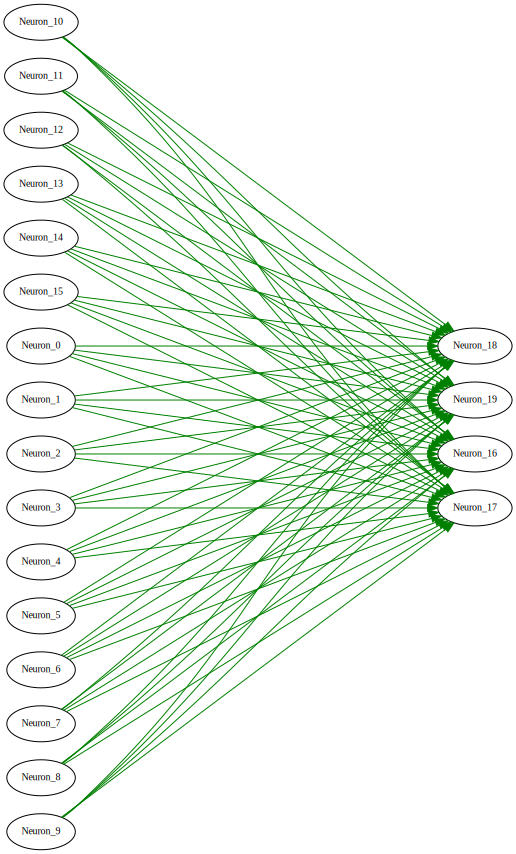

In [219]:
def create_dense_network(input_count=16, output_count=4):
    # Create input and output neurons
    input_neurons = [nn.NeuronGene(i, 0) for i in range(0, input_count)]
    output_neurons = [nn.NeuronGene(j + input_count, 0) for j in range(output_count)]
    
    # Create all possible synapse connections between input and output neurons
    synapse_gene = []
    SIN = 0
    for output_neuron in output_neurons:
        for input_neuron in input_neurons:
            synapse_gene.append(nn.SynapseGene(SIN, input_neuron, output_neuron, random.uniform(-1, 1), True))
            SIN += 1
            
    # Create the NetworkGenome
    network_genome = nn.NetworkGenome(input_neurons, output_neurons, [], synapse_gene)
    nn.NetworkGenome.SIN = SIN
    nn.NetworkGenome.NIN = input_count + output_count
    
    return network_genome

# Example usage
dense_network_genome = create_dense_network()
visualize_genome(dense_network_genome, 'LR', False, '5')

In [159]:
net = nn.Network(dense_network_genome)

In [160]:
s = Sandbox(net, False)

In [161]:
s.game

[[0, 0, 0, 0]
 [0, 2, 0, 0]
 [0, 0, 0, 0]
 [0, 0, 2, 0]]

In [162]:
for i in range(100):
    s.set_input()
    s.make_next_move()
    s.reset_update()

GameStuckException: Game stuck at score 4

In [226]:
sims = []
for i in range(1000):
    dense_network_genome = create_dense_network()
    net = nn.Network(dense_network_genome)
    s = Sandbox(net) # debug = False
    sims.append(s)
    try:
        for _ in range(100):
            s.set_input()
            s.make_next_move()
            s.reset_update()
    except:
        print(f'sim #{i} done: fitness -> {s.network.fitness}')

sim #0 done: fitness -> 4
sim #1 done: fitness -> 4
sim #2 done: fitness -> 2
sim #3 done: fitness -> 8
sim #4 done: fitness -> 2
sim #5 done: fitness -> 4
sim #6 done: fitness -> 4
sim #7 done: fitness -> 2
sim #8 done: fitness -> 4
sim #9 done: fitness -> 8
sim #10 done: fitness -> 4
sim #11 done: fitness -> 4
sim #12 done: fitness -> 8
sim #13 done: fitness -> 4
sim #14 done: fitness -> 4
sim #15 done: fitness -> 2
sim #16 done: fitness -> 2
sim #17 done: fitness -> 4
sim #18 done: fitness -> 4
sim #19 done: fitness -> 8
sim #20 done: fitness -> 8
sim #21 done: fitness -> 8
sim #22 done: fitness -> 4
sim #23 done: fitness -> 8
sim #24 done: fitness -> 8
sim #25 done: fitness -> 4
sim #26 done: fitness -> 4
sim #27 done: fitness -> 4
sim #28 done: fitness -> 2
sim #29 done: fitness -> 8
sim #30 done: fitness -> 4
sim #31 done: fitness -> 8
sim #32 done: fitness -> 16
sim #33 done: fitness -> 2
sim #34 done: fitness -> 4
sim #35 done: fitness -> 8
sim #36 done: fitness -> 4
sim #37 do

In [227]:
avg_fitness = sum([sim.network.fitness for sim in sims]) / 1000
avg_fitness

5.974

In [228]:
for _ in range(10):
    sims_2 = []
    for i, sim in enumerate(sims):
        sim.network.genome.mutate()
        net = nn.Network(sim.network.genome)
        s = Sandbox(net) # debug = False
        sims_2.append(s)
        try:
            for _ in range(100):
                s.set_input()
                s.make_next_move()
                s.reset_update()
        except:
            print(f'sim #{i} done: fitness -> {s.network.fitness}')
    print(sum([sim.network.fitness for sim in sims_2]) / 1000)

[synapse weight change mutation] @ sg 17 (0.06 -> 0.31)
sim #0 done: fitness -> 4
sim #1 done: fitness -> 4
[synapse weight change mutation] @ sg 43 (0.63 -> 0.92)
[synapse weight change mutation] @ sg 47 (0.07 -> 0.68)
[synapse weight change mutation] @ sg 52 (0.46 -> 0.89)
sim #2 done: fitness -> 4
[synapse weight change mutation] @ sg 31 (-0.98 -> 0.81)
3 attempts were made at creating a new synapse, but failed
sim #3 done: fitness -> 4
sim #4 done: fitness -> 4
[synapse weight change mutation] @ sg 38 (-0.75 -> 0.92)
[synapse weight change mutation] @ sg 44 (0.08 -> 0.85)
sim #5 done: fitness -> 4
sim #6 done: fitness -> 8
sim #7 done: fitness -> 4
[synapse weight change mutation] @ sg 16 (0.84 -> 0.31)
[synapse weight change mutation] @ sg 48 (-0.30 -> 0.59)
[synapse weight change mutation] @ sg 58 (-0.48 -> 0.19)
sim #8 done: fitness -> 4
sim #9 done: fitness -> 8
sim #10 done: fitness -> 4
sim #11 done: fitness -> 4
[synapse weight change mutation] @ sg 39 (-0.84 -> 0.94)
sim #1

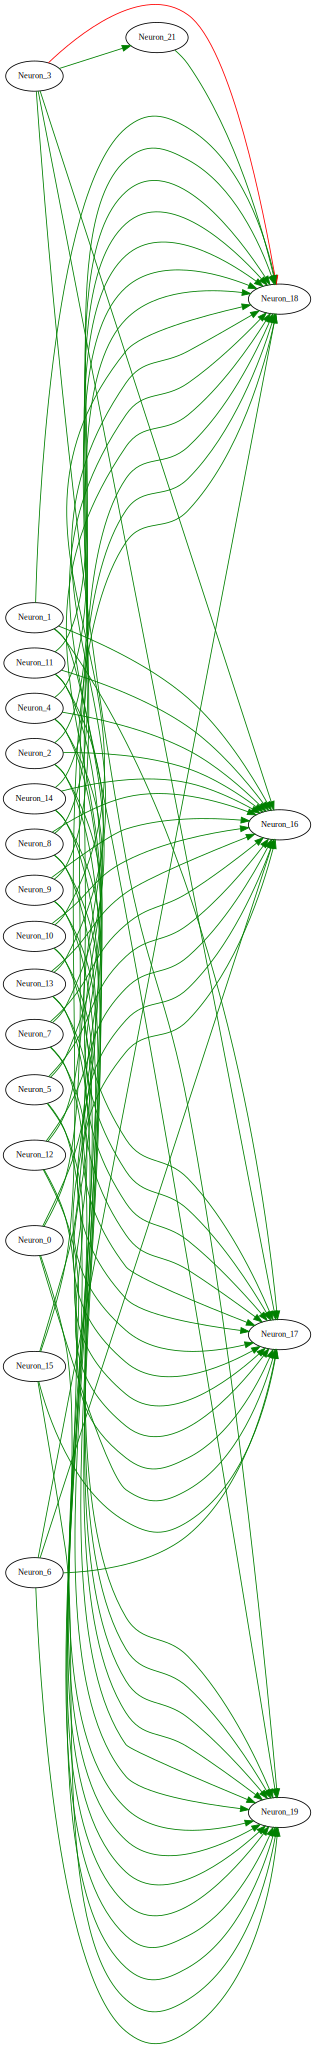

In [224]:
visualize_genome(sims_2[223].network.genome, 'LR', False)

In [207]:
sims_2[17].network.genome.fitness

8

In [214]:
avg_fitness = sum([sim.network.fitness for sim in sims_2]) / 1000
avg_fitness

5.76